to get these mass ball ncs look in SPINUP_extract.py
which is in pyscripts/extraction pyscripsts
relevant nc:

- PIACBC_2015_to_1127_SPINUP_massbal_comparison.nc

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
w =nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/NCS/SPINUP_BR2015_to1231.nc')
BR_surf_dic_1st = w['model_output']['surf_dic_1st'][:]
BR_surf_dic_2nd = w['model_output']['surf_dic_2nd'][:]
BR_surf_nit_1st = w['model_output']['surf_nit_1st'][:]
BR_surf_nit_2nd = w['model_output']['surf_nit_2nd'][:]
BR_surf_sal_1st = w['model_output']['surf_sal_1st'][:]
BR_surf_sal_2nd = w['model_output']['surf_sal_2nd'][:]

ts_BR = np.arange(0,len(BR_surf_sal_2nd),1)

w =nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/NCS/SPINUP_PI2015_to1229.nc')
PI_surf_dic_1st = w['model_output']['surf_dic_1st'][:]
PI_surf_dic_2nd = w['model_output']['surf_dic_2nd'][:]
PI_surf_nit_1st = w['model_output']['surf_nit_1st'][:]
PI_surf_nit_2nd = w['model_output']['surf_nit_2nd'][:]
PI_surf_sal_1st = w['model_output']['surf_sal_1st'][:]
PI_surf_sal_2nd = w['model_output']['surf_sal_2nd'][:]
ts_PI = np.arange(0,len(PI_surf_sal_2nd),1)


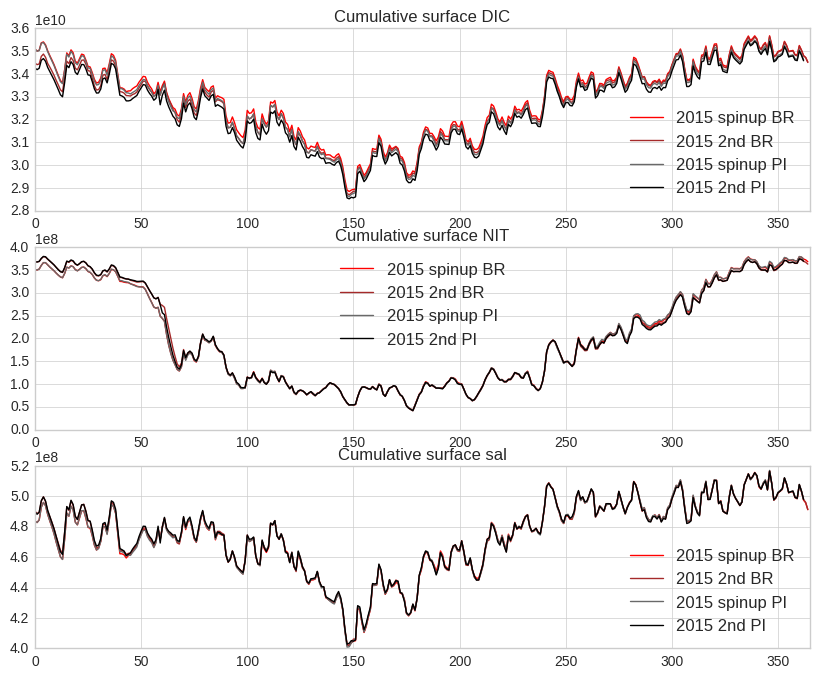

In [5]:
figstring = 'this'
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(3,1,1)
ax.plot(ts_BR,BR_surf_dic_1st,color = 'red',label = '2015 spinup BR')
ax.plot(ts_BR,BR_surf_dic_2nd,color = 'brown', label = '2015 2nd BR')

ax.plot(ts_PI,PI_surf_dic_1st,color = 'dimgrey',label = '2015 spinup PI')
ax.plot(ts_PI,PI_surf_dic_2nd,color = 'black', label = '2015 2nd PI')
ax.legend(loc = 'best')

plt.xlim([0,365])
plt.title('Cumulative surface DIC')

ax = fig.add_subplot(3,1,2)
ax.plot(ts_BR,BR_surf_nit_1st,color = 'red',label = '2015 spinup BR')
ax.plot(ts_BR,BR_surf_nit_2nd,color = 'brown', label = '2015 2nd BR')

ax.plot(ts_PI,PI_surf_nit_1st,color = 'dimgrey',label = '2015 spinup PI')
ax.plot(ts_PI,PI_surf_nit_2nd,color = 'black', label = '2015 2nd PI')
ax.legend(loc = 'best')

plt.xlim([0,365])
plt.title('Cumulative surface NIT')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_BR,BR_surf_sal_1st,color = 'red',label = '2015 spinup BR')
ax.plot(ts_BR,BR_surf_sal_2nd,color = 'brown', label = '2015 2nd BR')

ax.plot(ts_PI,PI_surf_sal_1st,color = 'dimgrey',label = '2015 spinup PI')
ax.plot(ts_PI,PI_surf_sal_2nd,color = 'black', label = '2015 2nd PI')
ax.legend(loc = 'best')

plt.xlim([0,365])
plt.title('Cumulative surface sal')
plt.show()

t_figstring = './FIGS/' + figstring + 'cumuflx.jpg'


#fig.savefig(t_figstring)


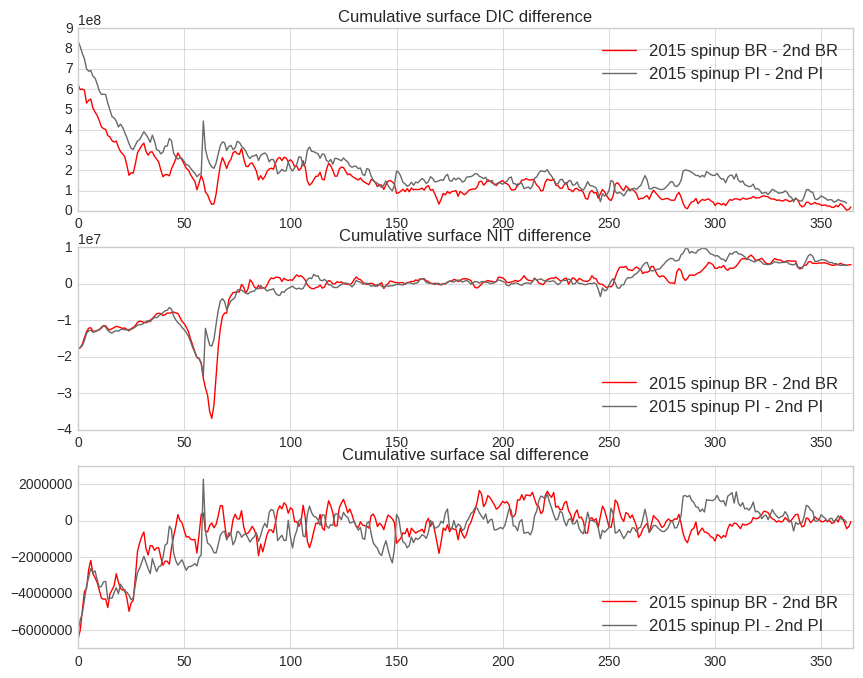

In [6]:
figstring = 'this'
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(3,1,1)
ax.plot(ts_BR,BR_surf_dic_1st - BR_surf_dic_2nd ,color = 'red',label = '2015 spinup BR - 2nd BR')
ax.plot(ts_PI,PI_surf_dic_1st-PI_surf_dic_2nd,color = 'dimgrey',label = '2015 spinup PI - 2nd PI')

ax.legend(loc = 'best')

plt.xlim([0,365])
plt.title('Cumulative surface DIC difference')

ax = fig.add_subplot(3,1,2)
ax.plot(ts_BR,BR_surf_nit_1st-BR_surf_nit_2nd,color = 'red',label = '2015 spinup BR - 2nd BR')
ax.plot(ts_PI,PI_surf_nit_1st-PI_surf_nit_2nd,color = 'dimgrey',label = '2015 spinup PI - 2nd PI')

ax.legend(loc = 'best')

plt.xlim([0,365])
plt.title('Cumulative surface NIT difference')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_BR,BR_surf_sal_1st-BR_surf_sal_2nd,color = 'red',label = '2015 spinup BR - 2nd BR')
ax.plot(ts_PI,PI_surf_sal_1st-PI_surf_sal_2nd,color = 'dimgrey',label = '2015 spinup PI - 2nd PI')

ax.legend(loc = 'best')

plt.xlim([0,365])
plt.title('Cumulative surface sal difference')
plt.show()

t_figstring = './FIGS/' + figstring + 'cumuflx.jpg'


#fig.savefig(t_figstring)
